<a href="https://colab.research.google.com/github/housekjh1/study-pandas/blob/main/1020_%ED%95%AD%EA%B3%B5%EC%82%AC%EB%B3%84_%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://kosis.kr/statHtml/statHtml.do?orgId=381&tblId=DT_920005_B008&vw_cd=MT_ZTITLE&list_id=M2_25&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

In [3]:
!pip install koreanize-matplotlib

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [10]:
df = pd.read_csv("항공사별_통계.csv")
df.head()

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤)
0,2005.01,아시아나항공,도착,6613,791439,28012
1,2005.01,아시아나항공,출발,6610,799835,29576
2,2005.01,대한항공,도착,8869,1372897,70544
3,2005.01,대한항공,출발,8870,1405847,78329
4,2005.01,외항사,도착,3145,443386,28311


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시점        3696 non-null   float64
 1   항공사별(1)   3696 non-null   object 
 2   도착출발별(1)  3696 non-null   object 
 3   운항 (편)    3696 non-null   int64  
 4   여객 (명)    3696 non-null   int64  
 5   화물 (톤)    3696 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 173.4+ KB


In [15]:
df["시점"] = df["시점"].astype("object")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시점        3696 non-null   object
 1   항공사별(1)   3696 non-null   object
 2   도착출발별(1)  3696 non-null   object
 3   운항 (편)    3696 non-null   int64 
 4   여객 (명)    3696 non-null   int64 
 5   화물 (톤)    3696 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 173.4+ KB


### 항공사별 연간 평균 여객 수

In [17]:
df.head()

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤)
0,2005.01,아시아나항공,도착,6613,791439,28012
1,2005.01,아시아나항공,출발,6610,799835,29576
2,2005.01,대한항공,도착,8869,1372897,70544
3,2005.01,대한항공,출발,8870,1405847,78329
4,2005.01,외항사,도착,3145,443386,28311


In [21]:
average_passengers_by_company = df.groupby("항공사별(1)")["여객 (명)"].mean()
average_passengers_by_company

항공사별(1)
대한항공       1.242783e+06
아시아나항공     8.323825e+05
에어로케이항공    2.546024e+04
에어부산       3.306300e+05
에어서울       9.265270e+04
에어인천       0.000000e+00
에어프레미아     1.422212e+04
외항사        6.813250e+05
이스타항공      2.298552e+05
제주항공       3.954043e+05
진에어        3.403002e+05
티웨이항공      3.220146e+05
플라이강원      1.850308e+04
Name: 여객 (명), dtype: float64

<Axes: xlabel='항공사별(1)'>

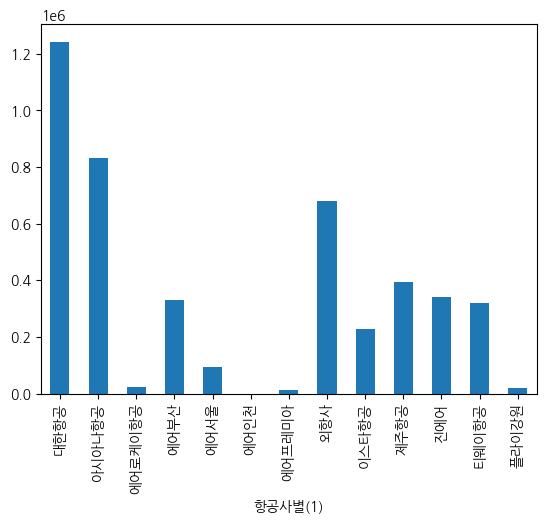

In [23]:
average_passengers_by_company.plot(kind="bar")

Plt - Plot(Line Plot : 추세, 경향 / Bar Plot : 비교(단일) / Scatter Plot : 분포)

### 항공사별 연간 운항 증감율 계산

In [25]:
df.groupby("항공사별(1)")["운항 (편)"].pct_change()*100

0            NaN
1      -0.045365
2            NaN
3       0.011275
4            NaN
          ...   
3691    0.000000
3692   -2.325581
3693   -0.793651
3694    1.698771
3695    0.208799
Name: 운항 (편), Length: 3696, dtype: float64

In [26]:
df.groupby("항공사별(1)")["여객 (명)"].pct_change()*100

0            NaN
1       1.060852
2            NaN
3       2.400034
4            NaN
          ...   
3691   -1.503926
3692   -7.574106
3693    0.640306
3694    5.884647
3695   -5.536417
Name: 여객 (명), Length: 3696, dtype: float64

### 도착/출발에 따른 시점별 연간 운행 및 여객 합산

In [27]:
df.head()

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤)
0,2005.01,아시아나항공,도착,6613,791439,28012
1,2005.01,아시아나항공,출발,6610,799835,29576
2,2005.01,대한항공,도착,8869,1372897,70544
3,2005.01,대한항공,출발,8870,1405847,78329
4,2005.01,외항사,도착,3145,443386,28311


In [32]:
df[df["도착출발별(1)"] == "도착"].groupby("시점")[["운항 (편)", "여객 (명)"]].sum()

,운항 (편),여객 (명)
시점,,
2005.01,18627,2607722
2005.02,17112,2451062
2005.03,18342,2462065
2005.04,18735,2823164
2005.05,19511,2836185
...,...,...
2023.04,31189,5233125
2023.05,33421,5529102
2023.06,33028,5618913


In [33]:
df[df["도착출발별(1)"] == "출발"].groupby("시점")[["운항 (편)", "여객 (명)"]].sum()

,운항 (편),여객 (명)
시점,,
2005.01,18633,2670910
2005.02,17111,2422116
2005.03,18356,2463440
2005.04,18732,2829839
2005.05,19522,2878604
...,...,...
2023.04,31241,5224918
2023.05,33424,5543240
2023.06,33044,5628668
